In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
loss = pd.read_csv('../src/0213_oshima/train/loss.csv')
inf =  pd.read_csv('../src/0213_oshima/train/inferenced.csv')
loss_linear = pd.read_csv('../src/0213_oshima_linear/train/loss.csv')
inf_linear =  pd.read_csv('../src/0213_oshima_linear/train/inferenced.csv')
loss_last = pd.read_csv('../src/0213_oshima_last/train/loss.csv')
inf_last =  pd.read_csv('../src/0213_oshima_last/train/inferenced.csv')
train = pd.read_csv('../data/raw/train.csv')
census = pd.read_csv('../data/raw/census_starter.csv')

In [20]:
loss.columns = ['cfips','val_loss_lgb']
loss = pd.merge(loss, loss_linear, on = 'cfips' , how = 'inner')

loss_last.columns = ['cfips','val_loss_last', 'sub_loss_last']
loss = pd.merge(loss, loss_last, on = 'cfips' , how = 'inner')

In [24]:
loss

,cfips,val_loss_lgb,val_loss,sub_loss,val_loss_last,sub_loss_last
0,1001,2.140530,2.341830,1.777248,2.341830,1.777248
1,1003,0.245646,0.532225,2.022442,0.532225,2.022442
2,1005,1.668872,1.637842,0.703457,1.637842,0.703457
3,1007,3.421424,4.035242,2.185854,4.035242,2.185854
4,1009,2.889400,2.810553,2.386762,2.810553,2.386762
...,...,...,...,...,...,...
3129,56037,1.587261,1.899199,1.185631,1.899199,1.185631
3130,56039,0.703905,1.332657,2.581890,1.332657,2.581890
3131,56041,1.452027,2.577591,4.191443,2.577591,4.191443
3132,56043,2.638057,2.589565,1.560315,2.589565,1.560315


(-5.0, 100.0)

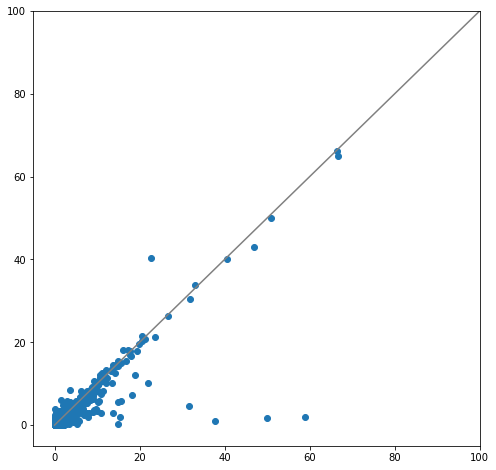

In [21]:
plt.figure(figsize = (8,8))
plt.scatter(loss['val_loss'], loss['val_loss_lgb'])
plt.plot(np.linspace(0,100,101),np.linspace(0,100,101),color = 'gray')
plt.xlim(-5,100)
plt.ylim(-5,100)

(-5.0, 100.0)

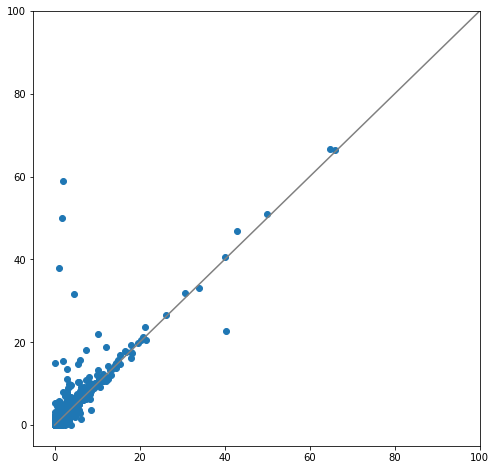

In [23]:
plt.figure(figsize = (8,8))
plt.scatter(loss['val_loss_lgb'], loss['val_loss_last'])
plt.plot(np.linspace(0,100,101),np.linspace(0,100,101),color = 'gray')
plt.xlim(-5,100)
plt.ylim(-5,100)

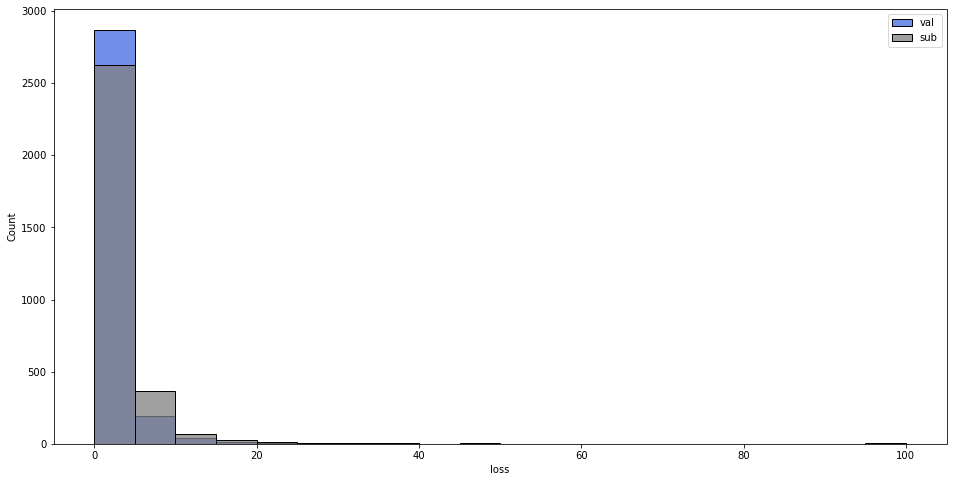

In [27]:
plt.figure(figsize = (16,8))
sns.histplot(loss['val_loss'],bins = np.linspace(0,100,21),color = 'royalblue',label = 'val')
sns.histplot(loss['sub_loss'],bins = np.linspace(0,100,21),color = 'gray',label = 'sub')
plt.xlabel('loss')
plt.legend()

In [28]:
#外部データとlossそのものの相関は弱い


(-1.0, 10.0)

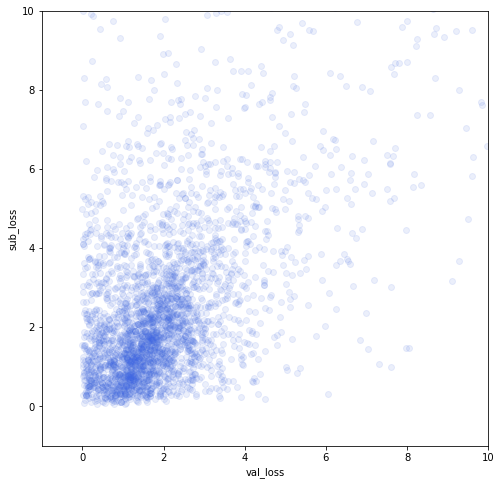

In [29]:
plt.figure(figsize = (8,8))
plt.scatter(loss['val_loss'],loss['sub_loss'],color = 'royalblue',alpha = 0.1)
plt.xlabel('val_loss')
plt.ylabel('sub_loss')
plt.xlim(-1,10)
plt.ylim(-1,10)

In [30]:
loss_census_active['active'].mean()

NameError: name 'loss_census_active' is not defined

In [31]:
sns.histplot(loss_census_active['active'],bins = np.linspace(0,10000,21))

NameError: name 'loss_census_active' is not defined

In [32]:
loss_cfips = loss[(loss['val_loss'] > 4.5) & loss['val_loss'] < 4.6]['cfips'].values

In [206]:
train['microbusiness_density_shift1'] = train.groupby('cfips')['microbusiness_density'].shift(1)

In [208]:
train['microbusiness_density_shift1'] = train.groupby('cfips')['microbusiness_density'].shift(1)
train['diff'] = train['microbusiness_density_shift1']- train['microbusiness_density']

In [35]:
train['month']= train['first_day_of_month'].apply(lambda x: x[0:7])

In [36]:
train['month']

0         2019-08
1         2019-09
2         2019-10
3         2019-11
4         2019-12
           ...   
122260    2022-06
122261    2022-07
122262    2022-08
122263    2022-09
122264    2022-10
Name: month, Length: 122265, dtype: object

In [37]:
sns.histplot(train[train['month'] == '02']['diff'], bins = np.linspace(-10,10,11))
plt.yscale('log')

KeyError: 'diff'

In [38]:
train[train['month'] == '03']['diff'].min()

KeyError: 'diff'

In [39]:
train[train['month'] == '02']['diff'].max()

KeyError: 'diff'

In [40]:
sns.histplot(train[train['month'] == '09']['diff'], bins = np.linspace(-10,10,11))
plt.yscale('log')

KeyError: 'diff'

In [41]:
train['diff_abs'] = train['diff'].abs()
train.groupby(['month'])['diff_abs'].median()

KeyError: 'diff'

In [42]:
train.iloc[68658    ]

row_id                   32510_2021-02-01
cfips                               32510
county                        Carson City
state                              Nevada
first_day_of_month             2021-02-01
microbusiness_density           154.77109
active                              67409
month                             2021-02
Name: 68658, dtype: object

In [43]:
train[train['month'] == '2021-02'].sort_values('diff')['cfips']

KeyError: 'diff'

In [44]:
plt.figure(figsize = (32, 8))
plt.plot(train.groupby(['month'])['diff_abs'].median() , marker = 'o')

KeyError: 'Column not found: diff_abs'

<Figure size 2304x576 with 0 Axes>

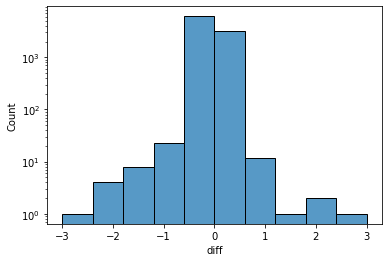

In [227]:
sns.histplot(train[train['month'] == '07']['diff'], bins = np.linspace(-3,3,11))
plt.yscale('log')

In [303]:
train[train['cfips'] == 8105]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,microbusiness_density_shift1,diff,month,diff_abs,tmp
11505,8105_2019-08-01,8105,Rio Grande County,Colorado,2019-08-01,12.616126,1100,NaN,NaN,2019-08,NaN,87.189998
11506,8105_2019-09-01,8105,Rio Grande County,Colorado,2019-09-01,8.464273,738,12.616126,4.151853,2019-09,4.151853,87.189999
11507,8105_2019-10-01,8105,Rio Grande County,Colorado,2019-10-01,12.237642,1067,8.464273,-3.773369,2019-10,3.773369,87.190000
11508,8105_2019-11-01,8105,Rio Grande County,Colorado,2019-11-01,23.064571,2011,12.237642,-10.826929,2019-11,10.826929,87.190002
11509,8105_2019-12-01,8105,Rio Grande County,Colorado,2019-12-01,26.367702,2299,23.064571,-3.303131,2019-12,3.303131,87.190002
11510,8105_2020-01-01,8105,Rio Grande County,Colorado,2020-01-01,26.472618,2301,26.367702,-0.104916,2020-01,0.104916,86.920002
11511,8105_2020-02-01,8105,Rio Grande County,Colorado,2020-02-01,25.241602,2194,26.472618,1.231016,2020-02,1.231016,86.919998
11512,8105_2020-03-01,8105,Rio Grande County,Colorado,2020-03-01,26.622181,2314,25.241602,-1.380579,2020-03,1.380579,86.920001
11513,8105_2020-04-01,8105,Rio Grande County,Colorado,2020-04-01,29.440865,2559,26.622181,-2.818684,2020-04,2.818684,86.920000
11514,8105_2020-05-01,8105,Rio Grande County,Colorado,2020-05-01,30.717901,2670,29.440865,-1.277036,2020-05,1.277036,86.920001


In [45]:
for cfip in train[train['month'] == '2021-02'].sort_values('diff')['cfips'][:5]:
    plt.figure(figsize = (16,8))
    print(cfip)
    plt.plot(pd.to_datetime(train[train['cfips'] == cfip]['first_day_of_month']), train[train['cfips'] == cfip]['microbusiness_density'],marker = 'o',color = 'royalblue')
    plt.plot(pd.to_datetime(train[train['cfips'] == cfip]['first_day_of_month'])[-4:], inf[f'{cfip}'].values,marker = 'o',color = 'gray')

KeyError: 'diff'

In [124]:
census.columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [126]:
census_sample = census[['cfips','pct_bb_2021','pct_college_2021','pct_foreign_born_2021','pct_it_workers_2021','median_hh_inc_2021']]

In [129]:
loss_census = pd.merge(loss,census_sample,on = 'cfips',how = 'inner')
active = train.groupby('cfips')['active'].mean()
loss_census_active = pd.merge(loss_census,active,on = 'cfips',how = 'inner')

In [130]:
loss_census

,cfips,val_loss,sub_loss,pct_bb_2021,pct_college_2021,pct_foreign_born_2021,pct_it_workers_2021,median_hh_inc_2021
0,1001,2.341830,1.777248,85.5,16.4,2.1,1.1,62660.0
1,1003,0.532225,2.022442,87.9,20.6,3.5,1.3,64346.0
2,1005,1.637842,0.703457,64.6,6.7,2.6,0.8,36422.0
3,1007,4.035242,2.185854,74.6,7.9,1.1,2.1,54277.0
4,1009,2.810553,2.386762,81.0,9.3,4.5,0.9,52830.0
...,...,...,...,...,...,...,...,...
3130,56037,1.899199,1.185631,88.4,12.4,5.5,1.0,76668.0
3131,56039,1.332657,2.581890,90.5,38.3,11.1,2.0,94498.0
3132,56041,2.577591,4.191443,90.6,12.3,2.9,0.9,75106.0
3133,56043,2.589565,1.560315,85.4,17.2,1.0,1.1,62271.0


In [18]:
loss['diff'] = loss['val_loss'] - loss['val_loss_lgb']

In [58]:
loss = loss.sort_values('diff' , ascending=False)
loss

,cfips,val_loss_lgb,val_loss,sub_loss,diff
1426,28055,0.000000,200.000000,200.000000,200.000000
630,17075,2.780353,140.394481,200.000000,137.614127
2420,46127,1.863529,58.975890,187.045337,57.112361
1760,32510,1.809719,49.971740,99.026446,48.162021
2943,51830,0.997799,37.848186,162.612109,36.850387
...,...,...,...,...,...
2009,38045,4.878754,1.910662,19.137858,-2.968091
1709,31115,3.908545,0.108896,0.327082,-3.799649
2411,46107,6.152023,1.533987,17.376549,-4.618035
502,13239,8.577033,3.699701,5.619376,-4.877333


In [61]:
loss['val_loss'].mean()

2.599261771329296

28055
17075
46127
32510
51830


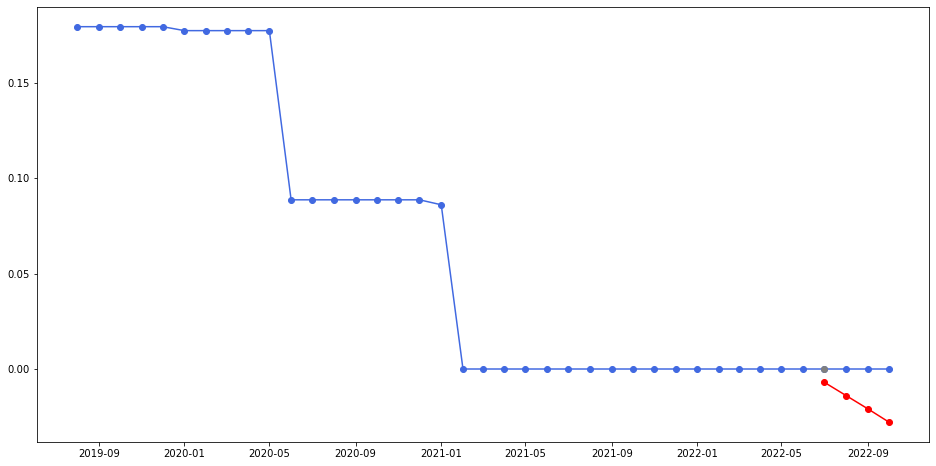

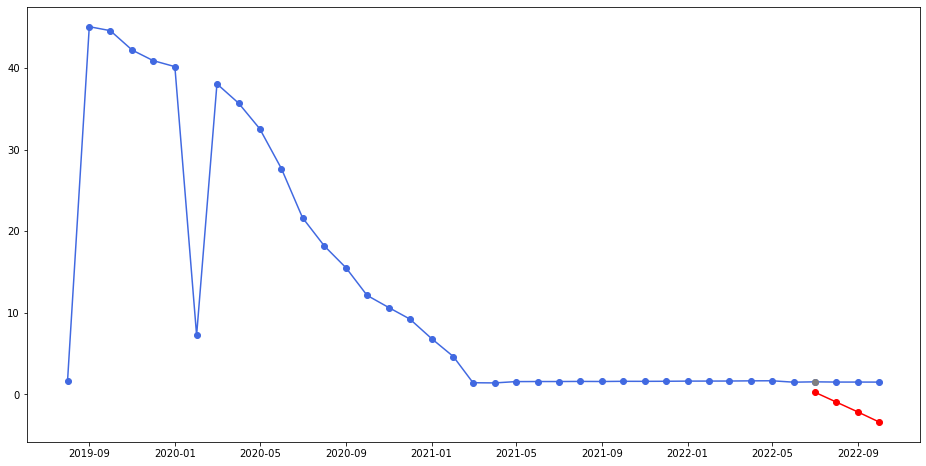

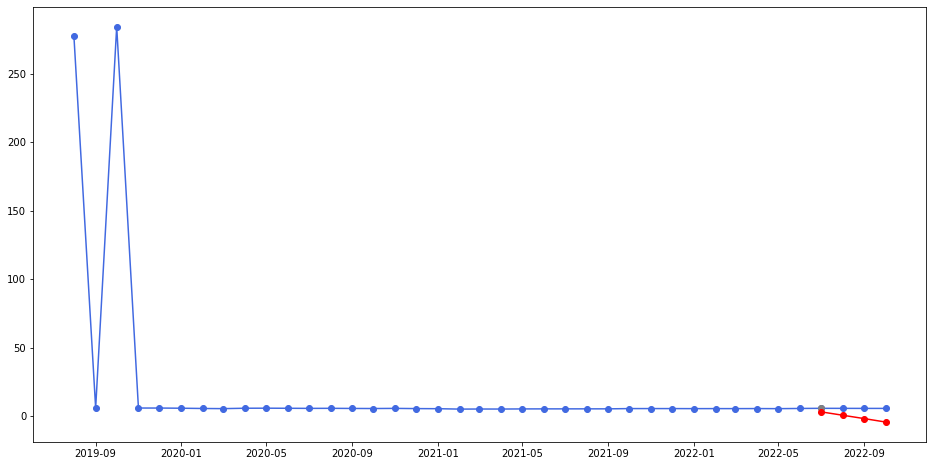

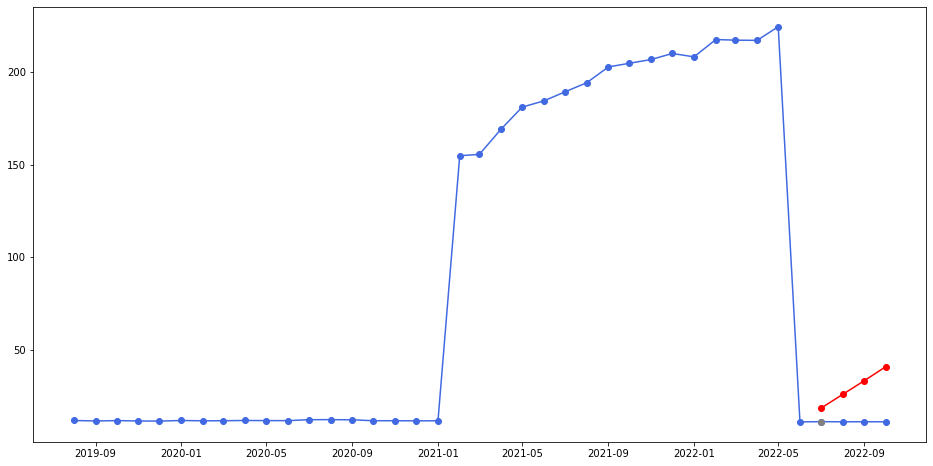

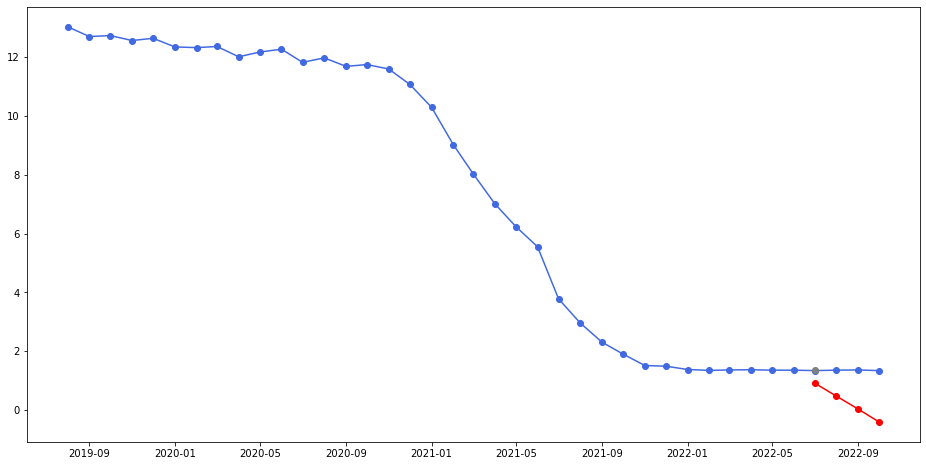

In [59]:
for cfip in loss['cfips'][:]:
    plt.figure(figsize = (16,8))
    print(cfip)
    plt.plot(pd.to_datetime(train[train['cfips'] == cfip]['first_day_of_month']), train[train['cfips'] == cfip]['microbusiness_density'],marker = 'o',color = 'royalblue')
    plt.plot(pd.to_datetime('2022/7'), inf[f'{cfip}'].values,marker = 'o',color = 'gray')
    plt.plot(pd.to_datetime(train[train['cfips'] == cfip]['first_day_of_month'])[-4:], inf_linear[f'{cfip}'].values,marker = 'o',color = 'red')

In [51]:
inf

,1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,3.365159,8.552429,1.196785,1.281963,1.779609,0.944739,1.994076,2.741352,1.478038,1.127854,...,1.721112,6.131871,3.227244,113.457613,7.771484,2.791617,25.757313,3.924413,3.141816,1.81021
